In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [3]:
raw_data = pd.read_csv(r"C:\Users\mnkp9\dataset.csv")

# Let's explore the top 5 rows of the df
raw_data.head()

,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,NaN,GMC,Yukon XL,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive


In [4]:
# Descriptive statistics are very useful for initial exploration of the variables
# By default, only descriptives for the numerical variables are shown
# To include the categorical ones, you should specify this with an argument
raw_data.describe(include='all')

# Note that categorical variables don't have some types of numerical descriptives
# and numerical variables don't have some types of categorical descriptives

,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
count,1002,946,1002,1002,1002.000000,979.000000,1000,897.000000,995,968.000000,1000,1001,999,995.000000,997,964,1002
unique,358,761,28,153,NaN,NaN,100,NaN,7,NaN,38,197,8,NaN,263,91,4
top,2023 Dodge Durango Pursuit,\n \n .\n \n,Jeep,Hornet,NaN,NaN,16V GDI DOHC Turbo,NaN,Gasoline,NaN,8-Speed Automatic,Limited,SUV,NaN,Bright White Clearcoat,Black,All-wheel Drive
freq,33,13,194,65,NaN,NaN,130,NaN,664,NaN,325,69,704,NaN,81,510,461
mean,NaN,NaN,NaN,NaN,2023.916168,50202.985700,NaN,4.975474,NaN,69.033058,NaN,NaN,NaN,3.943719,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,0.298109,18700.392062,NaN,1.392526,NaN,507.435745,NaN,NaN,NaN,0.274409,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,2023.000000,0.000000,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,2.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,2024.000000,36600.000000,NaN,4.000000,NaN,4.000000,NaN,NaN,NaN,4.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,2024.000000,47165.000000,NaN,4.000000,NaN,8.000000,NaN,NaN,NaN,4.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,2024.000000,58919.500000,NaN,6.000000,NaN,13.000000,NaN,NaN,NaN,4.000000,NaN,NaN,NaN


In [5]:
print(raw_data.columns)

Index(['name', 'description', 'make', 'model', 'year', 'price', 'engine',
       'cylinders', 'fuel', 'mileage', 'transmission', 'trim', 'body', 'doors',
       'exterior_color', 'interior_color', 'drivetrain'],
      dtype='object')


In [6]:
data = raw_data.drop(['model'],axis=1)


data.describe(include='all')

,name,description,make,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
count,1002,946,1002,1002.000000,979.000000,1000,897.000000,995,968.000000,1000,1001,999,995.000000,997,964,1002
unique,358,761,28,NaN,NaN,100,NaN,7,NaN,38,197,8,NaN,263,91,4
top,2023 Dodge Durango Pursuit,\n \n .\n \n,Jeep,NaN,NaN,16V GDI DOHC Turbo,NaN,Gasoline,NaN,8-Speed Automatic,Limited,SUV,NaN,Bright White Clearcoat,Black,All-wheel Drive
freq,33,13,194,NaN,NaN,130,NaN,664,NaN,325,69,704,NaN,81,510,461
mean,NaN,NaN,NaN,2023.916168,50202.985700,NaN,4.975474,NaN,69.033058,NaN,NaN,NaN,3.943719,NaN,NaN,NaN
std,NaN,NaN,NaN,0.298109,18700.392062,NaN,1.392526,NaN,507.435745,NaN,NaN,NaN,0.274409,NaN,NaN,NaN
min,NaN,NaN,NaN,2023.000000,0.000000,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,2.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,2024.000000,36600.000000,NaN,4.000000,NaN,4.000000,NaN,NaN,NaN,4.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,2024.000000,47165.000000,NaN,4.000000,NaN,8.000000,NaN,NaN,NaN,4.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,2024.000000,58919.500000,NaN,6.000000,NaN,13.000000,NaN,NaN,NaN,4.000000,NaN,NaN,NaN


In [7]:
data.isnull().sum()

name                0
description        56
make                0
year                0
price              23
engine              2
cylinders         105
fuel                7
mileage            34
transmission        2
trim                1
body                3
doors               7
exterior_color      5
interior_color     38
drivetrain          0
dtype: int64

In [8]:
data_no_mv = data.dropna(axis=0)

In [9]:
data_no_mv.describe(include='all')

,name,description,make,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
count,750,750,750,750.000000,750.000000,750,750.000000,750,750.000000,750,750,750,750.000000,750,750,750
unique,269,596,25,NaN,NaN,86,NaN,6,NaN,32,162,8,NaN,221,75,4
top,2023 Dodge Durango Pursuit,2023 Dodge Durango AWD Pursuit White Knuckle C...,Jeep,NaN,NaN,16V GDI DOHC Turbo,NaN,Gasoline,NaN,8-Speed Automatic,Limited,SUV,NaN,Bright White Clearcoat,Black,All-wheel Drive
freq,33,9,164,NaN,NaN,105,NaN,541,NaN,265,53,509,NaN,72,399,305
mean,NaN,NaN,NaN,2023.906667,49011.205333,NaN,5.016000,NaN,80.212000,NaN,NaN,NaN,3.937333,NaN,NaN,NaN
std,NaN,NaN,NaN,0.304542,17377.814762,NaN,1.413178,NaN,571.840104,NaN,NaN,NaN,0.287837,NaN,NaN,NaN
min,NaN,NaN,NaN,2023.000000,0.000000,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,2.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,2024.000000,35786.500000,NaN,4.000000,NaN,3.000000,NaN,NaN,NaN,4.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,2024.000000,46862.500000,NaN,4.000000,NaN,8.000000,NaN,NaN,NaN,4.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,2024.000000,58895.500000,NaN,6.000000,NaN,13.750000,NaN,NaN,NaN,4.000000,NaN,NaN,NaN


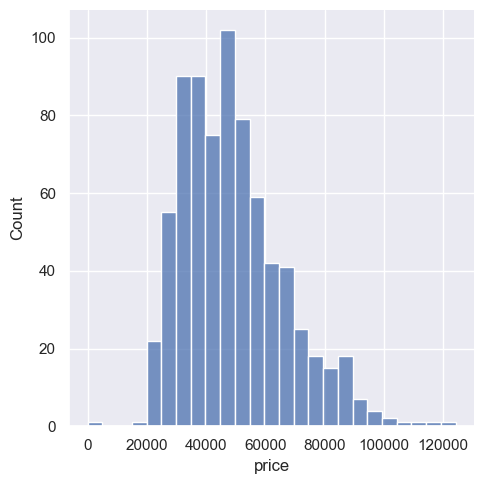

In [24]:
sns.displot(data_no_mv['price'])


In [11]:
q = data_no_mv['price'].quantile(0.99)
# Then we can create a new df, with the condition that all prices must be below the 99 percentile of 'Price'
data_1 = data_no_mv[data_no_mv['price']<q]
# In this way we have essentially removed the top 1% of the data about 'Price'
data_1.describe(include='all')

,name,description,make,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
count,742,742,742,742.000000,742.000000,742,742.000000,742,742.000000,742,742,742,742.000000,742,742,742
unique,263,590,25,NaN,NaN,85,NaN,6,NaN,32,160,8,NaN,220,75,4
top,2023 Dodge Durango Pursuit,2023 Dodge Durango AWD Pursuit White Knuckle C...,Jeep,NaN,NaN,16V GDI DOHC Turbo,NaN,Gasoline,NaN,8-Speed Automatic,Limited,SUV,NaN,Bright White Clearcoat,Black,All-wheel Drive
freq,33,9,161,NaN,NaN,105,NaN,535,NaN,260,53,504,NaN,71,397,303
mean,NaN,NaN,NaN,2023.907008,48382.277628,NaN,4.997305,NaN,73.494609,NaN,NaN,NaN,3.936658,NaN,NaN,NaN
std,NaN,NaN,NaN,0.304229,16349.555881,NaN,1.405596,NaN,550.866950,NaN,NaN,NaN,0.289312,NaN,NaN,NaN
min,NaN,NaN,NaN,2023.000000,0.000000,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,2.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,2024.000000,35698.250000,NaN,4.000000,NaN,3.000000,NaN,NaN,NaN,4.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,2024.000000,46835.000000,NaN,4.000000,NaN,8.000000,NaN,NaN,NaN,4.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,2024.000000,58693.750000,NaN,6.000000,NaN,13.000000,NaN,NaN,NaN,4.000000,NaN,NaN,NaN


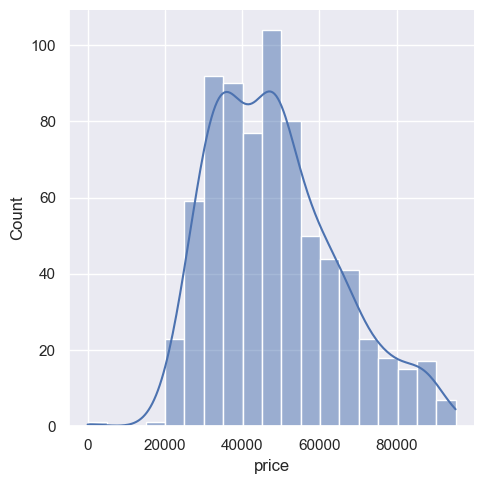

In [18]:
sns.displot(data_1['price'],kde=True)

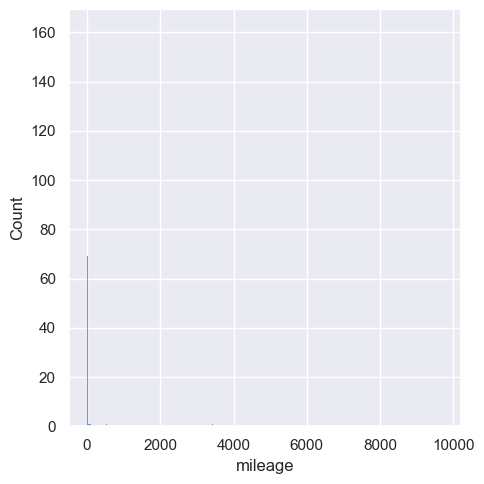

In [19]:
sns.displot(data_no_mv['mileage'])

In [20]:
q = data_1['mileage'].quantile(0.99)
data_2 = data_1[data_1['mileage']<q]

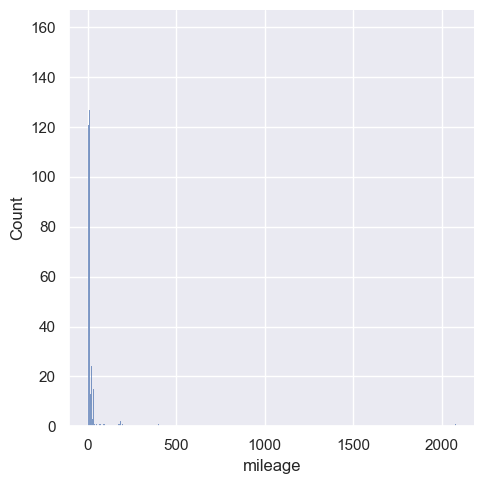

In [21]:
sns.displot(data_2['mileage'])

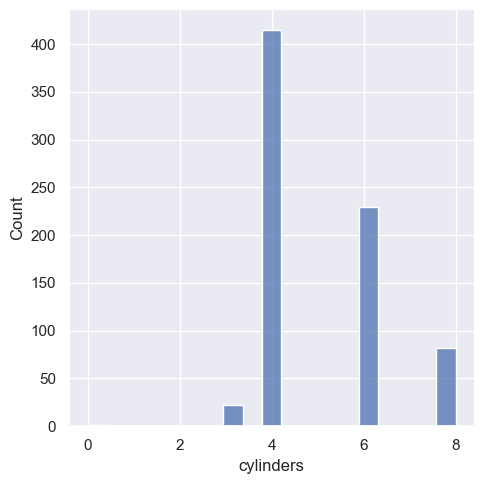

In [25]:
# The situation with engine volume is very strange
# In such cases it makes sense to manually check what may be causing the problem
# In our case the issue comes from the fact that most missing values are indicated with 99.99 or 99
# There are also some incorrect entries like 75
sns.displot(data_no_mv['cylinders'])

In [26]:
data_3 = data_2[data_2['cylinders']<6.5]

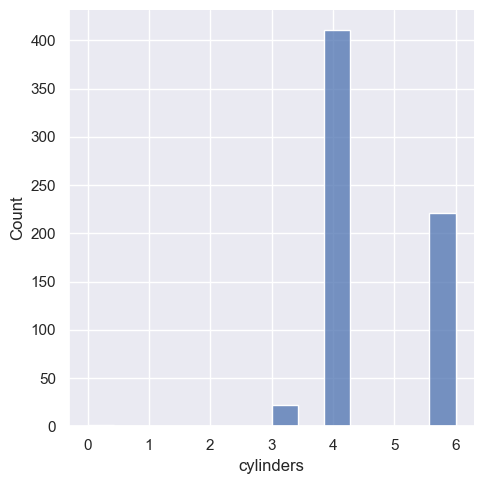

In [28]:
sns.displot(data_3['cylinders'])

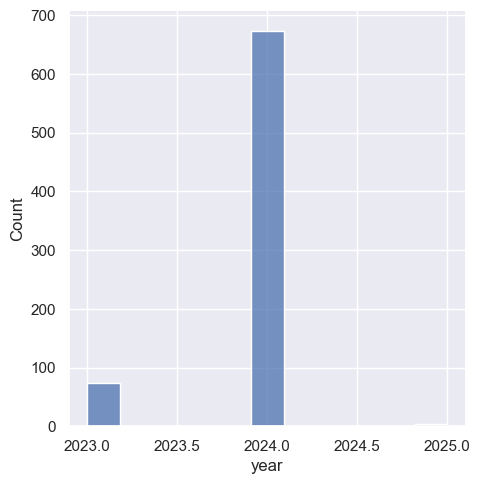

In [29]:
sns.displot(data_no_mv['year'])

In [30]:
# I'll simply remove them
q = data_3['year'].quantile(0.01)
data_4 = data_3[data_3['year']>q]

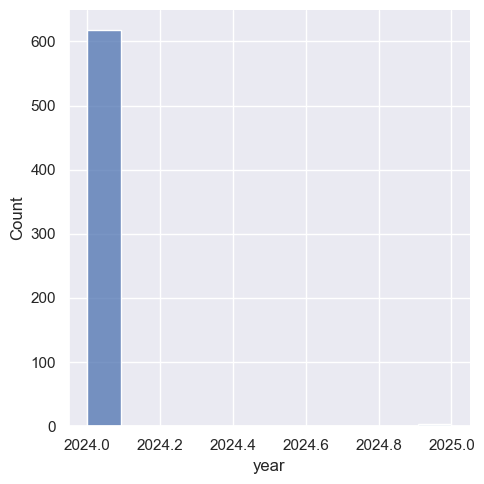

In [32]:
# Here's the new result
sns.displot(data_4['year'])

In [33]:
data_cleaned = data_4.reset_index(drop=True)

In [34]:
# Let's see what's left
data_cleaned.describe(include='all')

,name,description,make,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
count,621,621,621,621.000000,621.000000,621,621.000000,621,621.000000,621,621,621,621.000000,621,621,621
unique,222,516,25,NaN,NaN,71,NaN,5,NaN,30,143,6,NaN,202,67,4
top,2024 Jeep Compass Latitude,"\n \n At Walser, youll get an exce...",Jeep,NaN,NaN,16V GDI DOHC Turbo,NaN,Gasoline,NaN,8-Speed Automatic,Limited,SUV,NaN,Bright White Clearcoat,Black,All-wheel Drive
freq,27,9,150,NaN,NaN,102,NaN,423,NaN,194,52,451,NaN,61,322,259
mean,NaN,NaN,NaN,2024.004831,47656.048309,NaN,4.602254,NaN,20.864734,NaN,NaN,NaN,3.953301,NaN,NaN,NaN
std,NaN,NaN,NaN,0.069393,16874.158081,NaN,0.974478,NaN,119.874253,NaN,NaN,NaN,0.225924,NaN,NaN,NaN
min,NaN,NaN,NaN,2024.000000,0.000000,NaN,3.000000,NaN,0.000000,NaN,NaN,NaN,2.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,2024.000000,34305.000000,NaN,4.000000,NaN,4.000000,NaN,NaN,NaN,4.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,2024.000000,44604.000000,NaN,4.000000,NaN,8.000000,NaN,NaN,NaN,4.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,2024.000000,58779.000000,NaN,6.000000,NaN,12.000000,NaN,NaN,NaN,4.000000,NaN,NaN,NaN


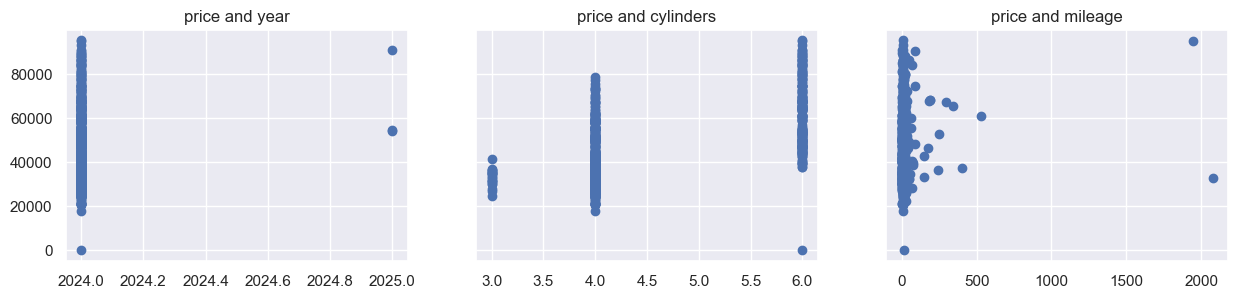

In [35]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data_cleaned['year'],data_cleaned['price'])
ax1.set_title('price and year')
ax2.scatter(data_cleaned['cylinders'],data_cleaned['price'])
ax2.set_title('price and cylinders')
ax3.scatter(data_cleaned['mileage'],data_cleaned['price'])
ax3.set_title('price and mileage')


plt.show()

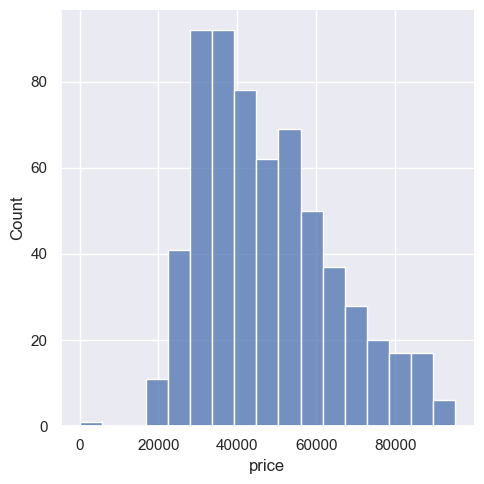

In [37]:
sns.displot(data_cleaned['price'])

In [41]:
# Let's transform 'Price' with a log transformation
log_price = np.log(data_cleaned['price'])

# Then we add it to our data frame
data_cleaned['log_price'] = log_price
data_cleaned

C:\Users\mnkp9\anaconda3\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,name,description,make,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain,log_price
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive,11.219896
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive,10.823173
2,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive,11.310356
3,2024 Jeep Wagoneer Base,\n \n Alloy Wheels / Premium Whee...,Jeep,2024,63862.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,5.0,8-Speed Automatic,Base,SUV,4.0,Bright White Clearcoat,Black,Rear-wheel Drive,11.064480
4,2024 Jeep Grand Cherokee Altitude,\n \n Silver Zynith 2024 Jeep Gran...,Jeep,2024,42773.0,"ar 3.6L V-6 DOHC, variable valve control, regu...",6.0,Gasoline,20.0,Automatic,Altitude,SUV,4.0,Silver Zynith,Global Black,Four-wheel Drive,10.663662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,2024 RAM 2500 Tradesman,"Since 1947, Shimkat Motor Company has been the...",RAM,2024,69315.0,24V DDI OHV Turbo Diesel,6.0,Diesel,0.0,Automatic,Tradesman,Pickup Truck,4.0,Bright White Clearcoat,Black,Four-wheel Drive,11.146417
617,2024 Mercedes-Benz Sprinter 2500 Standard Roof,2024 Mercedes-Benz Sprinter 2500 Cargo 144 WB ...,Mercedes-Benz,2024,59037.0,16V DDI DOHC Turbo Diesel,4.0,Diesel,10.0,9-Speed Automatic,Standard Roof,Cargo Van,3.0,Arctic White,Black,Rear-wheel Drive,10.985920
618,2024 Dodge Hornet Hornet R/T Plus Eawd,Dealer Comments +++ Price Ends 5/31/2024 +++ A...,Dodge,2024,49720.0,"4 gasoline direct injection, DOHC, Multiair va...",4.0,Gasoline,0.0,6-Spd Aisin F21-250 PHEV Auto Trans,Hornet R/T Plus Eawd,SUV,4.0,Acapulco Gold,Black,All-wheel Drive,10.814163
619,2024 Jeep Wagoneer Base,\n \n The ALL New Friendship CDJR ...,Jeep,2024,69085.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,20.0,8-Speed Automatic,Base,SUV,4.0,Diamond Black,Black,Four-wheel Drive,11.143093


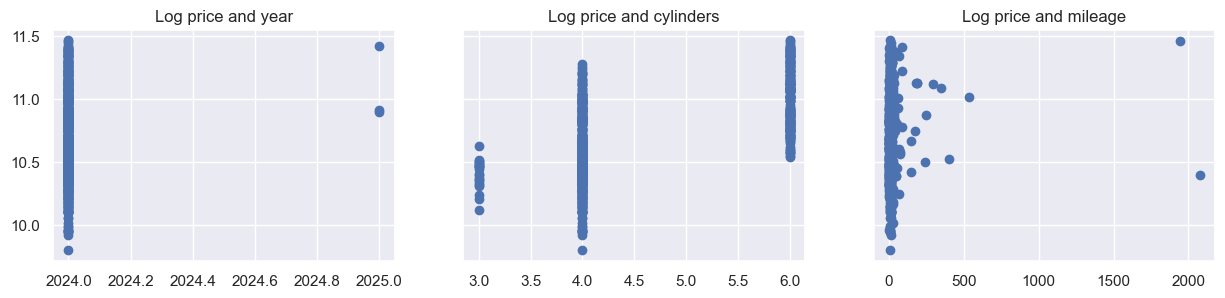

In [42]:
# Let's check the three scatters once again
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['year'],data_cleaned['log_price'])
ax1.set_title('Log price and year')
ax2.scatter(data_cleaned['cylinders'],data_cleaned['log_price'])
ax2.set_title('Log price and cylinders')
ax3.scatter(data_cleaned['mileage'],data_cleaned['log_price'])
ax3.set_title('Log price and mileage')


plt.show()

In [43]:
data_cleaned = data_cleaned.drop(['price'],axis=1)

In [44]:
# Let's quickly see the columns of our data frame
data_cleaned.columns.values

array(['name', 'description', 'make', 'year', 'engine', 'cylinders',
       'fuel', 'mileage', 'transmission', 'trim', 'body', 'doors',
       'exterior_color', 'interior_color', 'drivetrain', 'log_price'],
      dtype=object)

In [45]:
# sklearn does not have a built-in way to check for multicollinearity
# one of the main reasons is that this is an issue well covered in statistical frameworks and not in ML ones
# surely it is an issue nonetheless, thus we will try to deal with it

# Here's the relevant module
from statsmodels.stats.outliers_influence import variance_inflation_factor

# To make this as easy as possible to use, we declare a variable where we put
# all features where we want to check for multicollinearity
# since our categorical data is not yet preprocessed, we will only take the numerical ones
variables = data_cleaned[['mileage','year','cylinders']]

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = variables.columns

In [46]:
vif

,VIF,Features
0,1.034243,mileage
1,23.354609,year
2,23.429421,cylinders


In [47]:
data_no_multicollinearity = data_cleaned.drop(['year'],axis=1)

In [48]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [49]:
# Here's the result
data_with_dummies.head()

,cylinders,mileage,doors,log_price,name_2024 Audi A5 Sportback S line Premium,name_2024 Audi A5 Sportback S line Premium Plus,name_2024 Audi Q5 e 55 Premium Plus,name_2024 Audi Q5 e 55 Prestige,name_2024 Audi Q5 e Premium 55 TFSI e S line quattro S tronic,name_2024 Audi SQ5 Premium Plus,...,interior_color_Tupelo,interior_color_Tupelo/Black,interior_color_Volcano Brown,interior_color_White,interior_color_Wicker Beige/Black,interior_color_Wicker Beige/Global Black,interior_color_gray,drivetrain_Four-wheel Drive,drivetrain_Front-wheel Drive,drivetrain_Rear-wheel Drive
0,6.0,10.0,4.0,11.219896,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,6.0,1.0,4.0,10.823173,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,6.0,10.0,4.0,11.310356,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,6.0,5.0,4.0,11.064480,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,6.0,20.0,4.0,10.663662,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [50]:
data_with_dummies.columns.values

array(['cylinders', 'mileage', 'doors', ...,
       'drivetrain_Four-wheel Drive', 'drivetrain_Front-wheel Drive',
       'drivetrain_Rear-wheel Drive'], dtype=object)

In [65]:
cols = ['cylinders', 'mileage', 'doors','log_price',
       'drivetrain_Four-wheel Drive', 'drivetrain_Front-wheel Drive',
       'drivetrain_Rear-wheel Drive']

In [66]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,cylinders,mileage,doors,log_price,drivetrain_Four-wheel Drive,drivetrain_Front-wheel Drive,drivetrain_Rear-wheel Drive
0,6.0,10.0,4.0,11.219896,True,False,False
1,6.0,1.0,4.0,10.823173,True,False,False
2,6.0,10.0,4.0,11.310356,True,False,False
3,6.0,5.0,4.0,11.064480,False,False,True
4,6.0,20.0,4.0,10.663662,True,False,False


In [67]:
print(data_preprocessed.columns.tolist())

['cylinders', 'mileage', 'doors', 'log_price', 'drivetrain_Four-wheel Drive', 'drivetrain_Front-wheel Drive', 'drivetrain_Rear-wheel Drive']


In [68]:
# The target(s) (dependent variable) is 'log price'
targets = data_preprocessed['log_price']

# The inputs are everything BUT the dependent variable, so we can simply drop it
inputs = data_preprocessed.drop(['log_price'],axis=1)

In [69]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(inputs)

StandardScaler()

In [83]:
inputs_scaled = scaler.transform(inputs)

In [84]:
print("NaNs in x_train:", np.isnan(x_train).sum().sum())
print("Infs in x_train:", np.isinf(x_train).sum().sum())
print("NaNs in y_train:", np.isnan(y_train).sum())
print("Infs in y_train:", np.isinf(y_train).sum())

NaNs in x_train: 0
Infs in x_train: 0
NaNs in y_train: 0
Infs in y_train: 1


In [85]:
# Import the module for the split
from sklearn.model_selection import train_test_split
# Split the variables with an 80-20 split and some random state
# To have the same split as mine, use random_state = 365
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

In [86]:
x_y = pd.concat([pd.DataFrame(x_train), pd.Series(y_train, name="target")], axis=1)
x_y.replace([np.inf, -np.inf], np.nan, inplace=True)
x_y.dropna(inplace=True)

# Separate again
x_train_clean = x_y.drop("target", axis=1).values
y_train_clean = x_y["target"].values

In [88]:
x_train = np.nan_to_num(x_train, nan=0.0, posinf=0.0, neginf=0.0)
y_train = np.nan_to_num(y_train, nan=0.0, posinf=0.0, neginf=0.0)

In [89]:
reg = LinearRegression()
# Fit the regression with the scaled TRAIN inputs and targets
reg.fit(x_train,y_train)

LinearRegression()

In [90]:
y_hat = reg.predict(x_train)

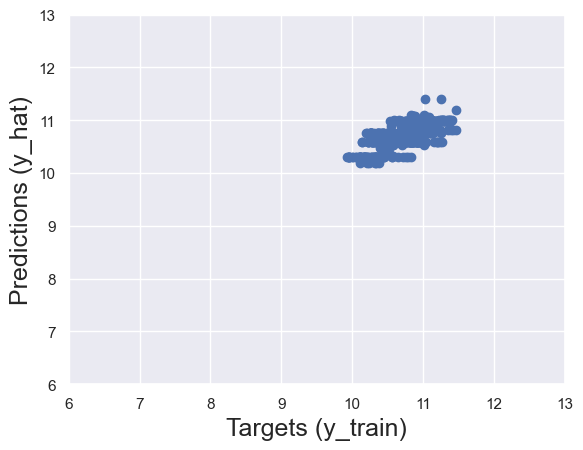

In [91]:
plt.scatter(y_train, y_hat)
# Let's also name the axes
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
# Sometimes the plot will have different scales of the x-axis and the y-axis
# This is an issue as we won't be able to interpret the '45-degree line'
# We want the x-axis and the y-axis to be the same
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

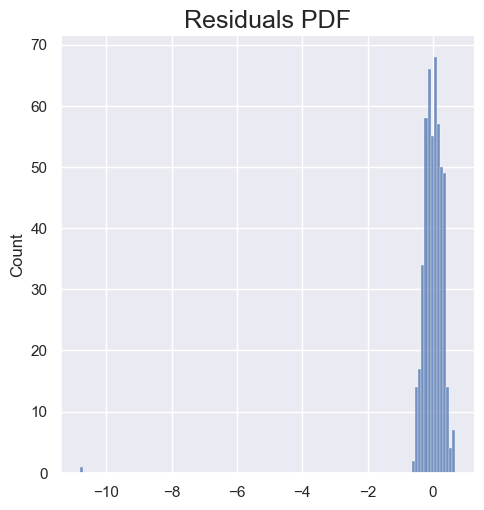

In [92]:
sns.displot(y_train - y_hat)

# Include a title
plt.title("Residuals PDF", size=18)

In [93]:
reg.score(x_train,y_train)

0.15547979490454578

In [94]:
# Obtain the bias (intercept) of the regression
reg.intercept_

10.690893748720443

In [95]:

# Obtain the weights (coefficients) of the regression
reg.coef_

array([ 0.11052105,  0.02364851, -0.04599266,  0.08626312, -0.10660041,
        0.01359366])

In [96]:
# Create a regression summary where we can compare them with one-another
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,cylinders,0.110521
1,mileage,0.023649
2,doors,-0.045993
3,drivetrain_Four-wheel Drive,0.086263
4,drivetrain_Front-wheel Drive,-0.106600
5,drivetrain_Rear-wheel Drive,0.013594


In [98]:
# Check the different categories in the 'Brand' variable
data_cleaned['name'].unique()

array(['2024 Jeep Wagoneer Series II', '2024 Jeep Grand Cherokee Laredo',
       '2024 RAM 3500 Laramie', '2024 Jeep Wagoneer Base',
       '2024 Jeep Grand Cherokee Altitude', '2024 Jeep Compass Latitude',
       '2024 RAM 3500 Tradesman', '2024 Hyundai Santa Cruz 2.5T Limited',
       '2024 Hyundai Santa Cruz 2.5T XRT', '2024 Nissan Murano Platinum',
       '2024 Ford Explorer Timberline', '2024 Volkswagen Taos 1.5T SE',
       '2024 Volkswagen Jetta 1.4T S', '2024 Dodge Hornet R/T',
       '2024 Hyundai Tucson SEL', '2024 Hyundai Santa Cruz 2.5L SEL',
       '2024 Ford Explorer XLT', '2024 Jeep Compass Limited',
       '2024 Nissan Murano SV',
       '2024 Ford Transit-250 148 WB Medium Roof Cargo',
       '2024 Volkswagen Jetta 1.4T SE', '2024 Kia Seltos EX',
       '2024 Chevrolet Blazer 3LT', '2024 Jeep Wrangler Sport S',
       '2024 Jeep Grand Cherokee 4xe Trailhawk',
       '2024 Mazda CX-90 PHEV Preferred',
       '2024 Hyundai Sonata Hybrid Limited', '2024 Dodge Hornet R/T E

In [99]:
y_hat_test = reg.predict(x_test)

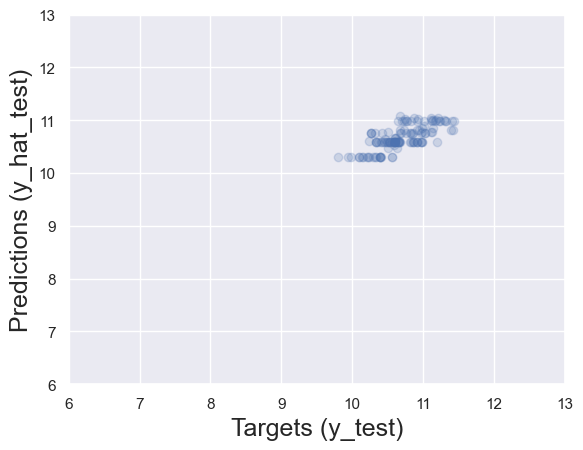

In [100]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [101]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,40146.148362
1,59749.432994
2,47408.522133
3,59502.214529
4,29785.069237


In [102]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,40146.148362,74600.0
1,59749.432994,NaN
2,47408.522133,NaN
3,59502.214529,NaN
4,29785.069237,NaN
...,...,...
120,39665.542632,NaN
121,39657.711972,NaN
122,59537.468728,NaN
123,47361.744319,NaN


In [103]:
y_test = y_test.reset_index(drop=True)

# Check the result
y_test.head()

0    10.243454
1    11.118727
2    10.810738
3    11.242428
4    10.238852
Name: log_price, dtype: float64

In [104]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,40146.148362,28098.0
1,59749.432994,67422.0
2,47408.522133,49550.0
3,59502.214529,76300.0
4,29785.069237,27969.0
...,...,...
120,39665.542632,40474.0
121,39657.711972,58049.0
122,59537.468728,71167.0
123,47361.744319,50565.0


In [105]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [106]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,40146.148362,28098.0,-12048.148362,42.879025
1,59749.432994,67422.0,7672.567006,11.379916
2,47408.522133,49550.0,2141.477867,4.321852
3,59502.214529,76300.0,16797.785471,22.015446
4,29785.069237,27969.0,-1816.069237,6.493150
...,...,...,...,...
120,39665.542632,40474.0,808.457368,1.997473
121,39657.711972,58049.0,18391.288028,31.682351
122,59537.468728,71167.0,11629.531272,16.341185
123,47361.744319,50565.0,3203.255681,6.334927


In [107]:
# Exploring the descriptives here gives us additional insights
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,125.000000,125.000000,125.000000,125.000000
mean,44363.982461,46953.792000,2589.809539,19.041927
std,10069.080988,16464.864476,12047.645391,15.067795
min,29785.069237,17994.000000,-22253.132198,0.023898
25%,39634.229266,34940.000000,-4870.467769,7.290256
50%,39822.480944,42715.000000,949.049518,16.665107
75%,49784.037150,56872.000000,10093.595212,27.771126
max,65243.132198,93303.000000,41180.617359,65.789439


In [108]:
pd.options.display.max_rows = 999
# Moreover, to make the dataset clear, we can display the result with only 2 digits after the dot 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Finally, we sort by difference in % and manually check the model
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
32,39822.48,39832.00,9.52,0.02
6,39665.54,39581.00,-84.54,0.21
117,39626.40,39763.00,136.60,0.34
66,39751.78,40085.00,333.22,0.83
97,47455.35,46973.00,-482.35,1.03
110,29802.72,30188.00,385.28,1.28
36,39634.23,40250.00,615.77,1.53
75,39634.23,40375.00,740.77,1.83
51,29950.18,29374.00,-576.18,1.96
120,39665.54,40474.00,808.46,2.00
